<a href="https://colab.research.google.com/github/aash2408/MachineLearningProjects/blob/main/Stock_price_prediction2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mastercard_stock_history.csv to Mastercard_stock_history.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Mastercard_stock_history.csv']), index_col = 'Date', parse_dates = True)

In [ ]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2006-05-25,3.748967,4.283869,3.739664,4.279217,395343000,0.00,0.0
2006-05-26,4.307126,4.348058,4.103398,4.179680,103044000,0.00,0.0
2006-05-30,4.183400,4.184330,3.986184,4.093164,49898000,0.00,0.0
2006-05-31,4.125723,4.219679,4.125723,4.180608,30002000,0.00,0.0
2006-06-01,4.179678,4.474572,4.176887,4.419686,62344000,0.00,0.0
...,...,...,...,...,...,...,...
2021-10-05,347.121403,348.130138,342.497241,342.776886,4724100,0.00,0.0
2021-10-06,339.580960,348.439763,338.682072,348.250000,3712000,0.00,0.0
2021-10-07,349.000000,357.899994,349.000000,353.910004,3209200,0.44,0.0


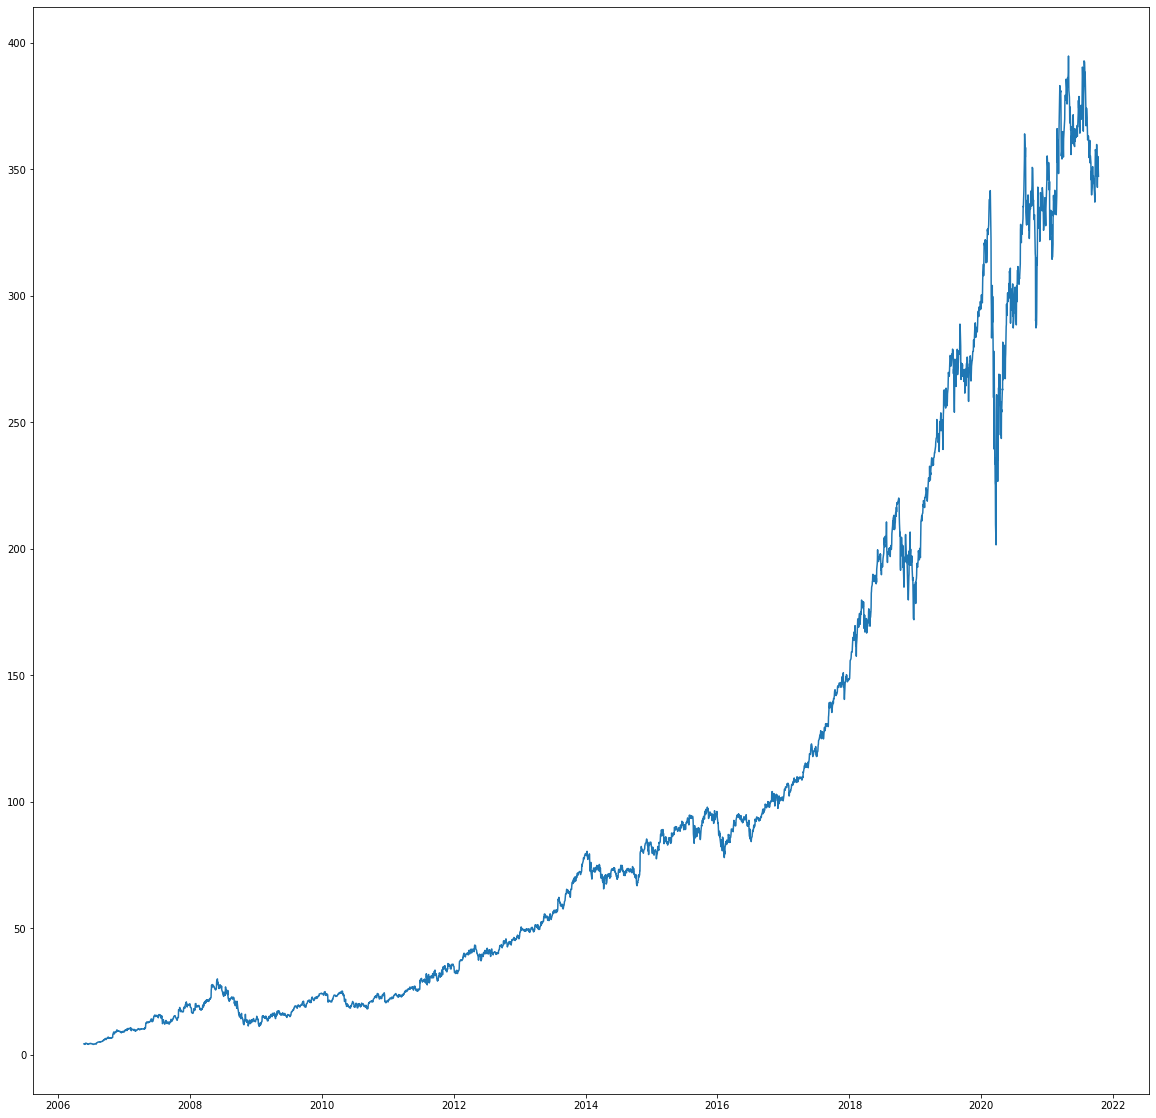

In [ ]:
plt.plot(df['Close'])
plt.rcParams['figure.figsize'] = (20, 20)

In [ ]:
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
data2 = df
data2

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2006-05-25,3.748967,4.283869,3.739664,4.279217,395343000,0.00,0.0
2006-05-26,4.307126,4.348058,4.103398,4.179680,103044000,0.00,0.0
2006-05-30,4.183400,4.184330,3.986184,4.093164,49898000,0.00,0.0
2006-05-31,4.125723,4.219679,4.125723,4.180608,30002000,0.00,0.0
2006-06-01,4.179678,4.474572,4.176887,4.419686,62344000,0.00,0.0
...,...,...,...,...,...,...,...
2021-10-05,347.121403,348.130138,342.497241,342.776886,4724100,0.00,0.0
2021-10-06,339.580960,348.439763,338.682072,348.250000,3712000,0.00,0.0
2021-10-07,349.000000,357.899994,349.000000,353.910004,3209200,0.44,0.0


In [ ]:
len(data2.iloc[0:3098, 3])

3098

In [ ]:
train_set = data2.iloc[0:3098, 3].values
train_set

array([  4.27921724,   4.17967987,   4.09316444, ..., 209.85688782,
       210.42715454, 213.56343079])

In [ ]:
train_set_copy = train_set.reshape(-1, 1)
train_set_copy

array([[  4.27921724],
       [  4.17967987],
       [  4.09316444],
       ...,
       [209.85688782],
       [210.42715454],
       [213.56343079]])

In [ ]:
train_set.shape

(3098,)

In [ ]:
train_set_copy.shape

(3098, 1)

In [ ]:
train_set_copy.shape[0]

3098

In [ ]:
train_set_copy.shape[1]

1

In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set_copy)
training_set_scaled

array([[9.32577304e-04],
       [4.57412242e-04],
       [4.44105026e-05],
       ...,
       [9.82305945e-01],
       [9.85028248e-01],
       [1.00000000e+00]])

In [ ]:
training_set_scaled.shape

(3098, 1)

In [ ]:
X_train = []
y_train = []
for i in range(7, 3098):
    X_train.append(training_set_scaled[i-7:i, 0])
    y_train.append(training_set_scaled[i, 0]) 
X_train
#X_train, y_train = np.array(X_train), np.array(y_train)

[array([9.32577304e-04, 4.57412242e-04, 4.44105026e-05, 4.61844187e-04,
        1.60313947e-03, 1.37221396e-03, 2.33144212e-03]),
 array([4.57412242e-04, 4.44105026e-05, 4.61844187e-04, 1.60313947e-03,
        1.37221396e-03, 2.33144212e-03, 1.95397106e-03]),
 array([4.44105026e-05, 4.61844187e-04, 1.60313947e-03, 1.37221396e-03,
        2.33144212e-03, 1.95397106e-03, 1.64310665e-03]),
 array([0.00046184, 0.00160314, 0.00137221, 0.00233144, 0.00195397,
        0.00164311, 0.00169641]),
 array([0.00160314, 0.00137221, 0.00233144, 0.00195397, 0.00164311,
        0.00169641, 0.00172305]),
 array([0.00137221, 0.00233144, 0.00195397, 0.00164311, 0.00169641,
        0.00172305, 0.00135446]),
 array([0.00233144, 0.00195397, 0.00164311, 0.00169641, 0.00172305,
        0.00135446, 0.00071054]),
 array([0.00195397, 0.00164311, 0.00169641, 0.00172305, 0.00135446,
        0.00071054, 0.00054179]),
 array([0.00164311, 0.00169641, 0.00172305, 0.00135446, 0.00071054,
        0.00054179, 0.00091038])

In [ ]:
y_train

[0.001953971061260641,
 0.0016431066484552809,
 0.0016964083567153967,
 0.0017230455530794116,
 0.0013544588684060999,
 0.0007105361729826017,
 0.0005417876446922529,
 0.0009103766056599016,
 0.0004973703132402744,
 0.00019539482983172568,
 5.328349790539172e-05,
 0.0006217174441390215,
 0.0011990312145921007,
 0.0013544588684060999,
 0.0015987075273580197,
 0.0015143298487713362,
 0.0013589044712516742,
 0.0018207418298481007,
 0.0018207418298481007,
 0.0015098796933370809,
 0.0016431066484552809,
 0.0012878431145526593,
 0.0009858608022610925,
 0.0011501819380605842,
 0.0010880026818753594,
 0.0007327345953840603,
 0.00036414108182773394,
 2.220297499013965e-05,
 3.9969452312063614e-05,
 0.0,
 0.0006128444488025866,
 0.0007327345953840603,
 0.0006128444488025866,
 0.0004884973179038396,
 0.0009680988775278496,
 0.0012345618929416081,
 0.0011635028125369339,
 0.0010658042594739008,
 0.0008748482036047313,
 0.0004884973179038396,
 0.002717790732148631,
 0.002704476686555303,
 0.0027311

In [ ]:
#Since X_train and y_train are lists, they need to be converted to np arrays
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train

array([[9.32577304e-04, 4.57412242e-04, 4.44105026e-05, ...,
        1.60313947e-03, 1.37221396e-03, 2.33144212e-03],
       [4.57412242e-04, 4.44105026e-05, 4.61844187e-04, ...,
        1.37221396e-03, 2.33144212e-03, 1.95397106e-03],
       [4.44105026e-05, 4.61844187e-04, 1.60313947e-03, ...,
        2.33144212e-03, 1.95397106e-03, 1.64310665e-03],
       ...,
       [9.83948956e-01, 9.92208955e-01, 9.98122804e-01, ...,
        9.79114544e-01, 9.71229606e-01, 9.73951836e-01],
       [9.92208955e-01, 9.98122804e-01, 9.71558194e-01, ...,
        9.71229606e-01, 9.73951836e-01, 9.82305945e-01],
       [9.98122804e-01, 9.71558194e-01, 9.79114544e-01, ...,
        9.73951836e-01, 9.82305945e-01, 9.85028248e-01]])

In [ ]:
y_train

array([0.00195397, 0.00164311, 0.00169641, ..., 0.98230595, 0.98502825,
       1.        ])

In [ ]:
X_train.shape

(3091, 7)

In [ ]:
y_train.shape

(3091,)

In [ ]:
#as input to an LSTM is always 3D, we are reshaping X_train so that it is 3D
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
X_train.shape


(3091, 7, 1)

In [ ]:
X_train.shape[1]

7

In [ ]:
X_train.shape[0]

3091

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 20, batch_size = 128)

Epoch 1/20
25/25 [==============================] - 8s 28ms/step - loss: 0.0446
Epoch 2/20
25/25 [==============================] - 1s 28ms/step - loss: 0.0036
Epoch 3/20
25/25 [==============================] - 1s 29ms/step - loss: 0.0019
Epoch 4/20
25/25 [==============================] - 1s 31ms/step - loss: 0.0018
Epoch 5/20
25/25 [==============================] - 1s 27ms/step - loss: 0.0015
Epoch 6/20
25/25 [==============================] - 1s 27ms/step - loss: 0.0014
Epoch 7/20
25/25 [==============================] - 1s 27ms/step - loss: 0.0014
Epoch 8/20
25/25 [==============================] - 1s 27ms/step - loss: 0.0012
Epoch 9/20
25/25 [==============================] - 1s 28ms/step - loss: 0.0012
Epoch 10/20
25/25 [==============================] - 1s 28ms/step - loss: 0.0011
Epoch 11/20
25/25 [==============================] - 1s 27ms/step - loss: 0.0011
Epoch 12/20
25/25 [==============================] - 1s 27ms/step - loss: 0.0011
Epoch 13/20
25/25 [==================

In [ ]:
data2.iloc[3098:, 3]

Date
2018-09-14    214.291016
2018-09-17    212.826050
2018-09-18    216.345840
2018-09-19    214.517136
2018-09-20    217.663239
                 ...    
2021-10-05    342.776886
2021-10-06    348.250000
2021-10-07    353.910004
2021-10-08    354.959991
2021-10-11    347.149994
Name: Close, Length: 774, dtype: float64

In [ ]:
len(data2.iloc[3098:, 3])

774

In [ ]:
testdata = data2.iloc[3098:, 3]
testdata

Date
2018-09-14    214.291016
2018-09-17    212.826050
2018-09-18    216.345840
2018-09-19    214.517136
2018-09-20    217.663239
                 ...    
2021-10-05    342.776886
2021-10-06    348.250000
2021-10-07    353.910004
2021-10-08    354.959991
2021-10-11    347.149994
Name: Close, Length: 774, dtype: float64

In [ ]:
inputs = testdata.values
inputs

array([214.29101562, 212.8260498 , 216.34584045, 214.51713562,
       217.66323853, 218.16465759, 217.62391663, 218.38095093,
       218.51861572, 218.56781006, 218.86271667, 220.00317383,
       218.62675476, 219.37397766, 212.51147461, 209.91290283,
       204.99137878, 206.46783447, 193.60293579, 191.4571991 ,
       201.01477051, 197.17599487, 204.51889038, 204.12519836,
       200.42419434, 199.87298584, 201.29040527, 199.25283813,
       192.61863708, 200.99507141, 194.39041138, 188.04162598,
       184.78356934, 194.56759644, 196.57557678, 194.61679077,
       194.8727417 , 196.02430725, 204.97171021, 205.58195496,
       202.39280701, 196.01449585, 195.05970764, 194.47898865,
       197.55984497, 195.9160614 , 186.3092804 , 184.12411499,
       184.71472168, 179.73410034, 188.83892822, 189.95120239,
       199.10523987, 193.57344055, 197.91421509, 206.56626892,
       197.34332275, 199.80410767, 193.41593933, 194.95147705,
       194.63647461, 197.14648438, 195.83735657, 192.26

In [ ]:
inputs = inputs.reshape(-1,1)
inputs

array([[214.29101562],
       [212.8260498 ],
       [216.34584045],
       [214.51713562],
       [217.66323853],
       [218.16465759],
       [217.62391663],
       [218.38095093],
       [218.51861572],
       [218.56781006],
       [218.86271667],
       [220.00317383],
       [218.62675476],
       [219.37397766],
       [212.51147461],
       [209.91290283],
       [204.99137878],
       [206.46783447],
       [193.60293579],
       [191.4571991 ],
       [201.01477051],
       [197.17599487],
       [204.51889038],
       [204.12519836],
       [200.42419434],
       [199.87298584],
       [201.29040527],
       [199.25283813],
       [192.61863708],
       [200.99507141],
       [194.39041138],
       [188.04162598],
       [184.78356934],
       [194.56759644],
       [196.57557678],
       [194.61679077],
       [194.8727417 ],
       [196.02430725],
       [204.97171021],
       [205.58195496],
       [202.39280701],
       [196.01449585],
       [195.05970764],
       [194

In [ ]:
inputs = sc.transform(inputs)
X_test = []
for i in range(7, 774):
    X_test.append(inputs[i-7:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
X_test.shape

(767, 7, 1)

In [ ]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price

array([[209.53206],
       [209.95021],
       [211.01637],
       [211.26839],
       [212.19853],
       [212.36575],
       [212.44618],
       [212.7446 ],
       [212.84047],
       [212.79286],
       [212.46661],
       [211.61804],
       [209.73224],
       [207.27235],
       [203.47926],
       [200.66347],
       [197.85806],
       [196.07394],
       [193.60774],
       [195.18616],
       [197.89648],
       [197.9846 ],
       [199.22313],
       [198.1131 ],
       [196.74934],
       [196.13353],
       [195.26637],
       [193.44963],
       [191.76189],
       [191.87132],
       [189.19772],
       [188.4308 ],
       [189.9818 ],
       [193.2257 ],
       [194.08293],
       [194.67029],
       [196.14505],
       [197.75948],
       [199.08191],
       [197.43533],
       [194.97913],
       [192.82451],
       [192.07562],
       [191.08739],
       [189.68478],
       [186.6725 ],
       [183.66533],
       [183.67679],
       [184.86809],
       [186.61913],


In [ ]:
real_stock_price = df['Close']
real_stock_price

Date
2006-05-25      4.279217
2006-05-26      4.179680
2006-05-30      4.093164
2006-05-31      4.180608
2006-06-01      4.419686
                 ...    
2021-10-05    342.776886
2021-10-06    348.250000
2021-10-07    353.910004
2021-10-08    354.959991
2021-10-11    347.149994
Name: Close, Length: 3872, dtype: float64

In [ ]:
predicted_stock_price = pd.DataFrame(predicted_stock_price)
len(predicted_stock_price)

767

In [ ]:
predicted_stock_price.index = df[3105:].index
predicted_stock_price

,0
Date,
2018-09-25,209.532059
2018-09-26,209.950211
2018-09-27,211.016373
2018-09-28,211.268387
2018-10-01,212.198532
...,...
2021-10-05,295.378937
2021-10-06,294.575287
2021-10-07,293.738678


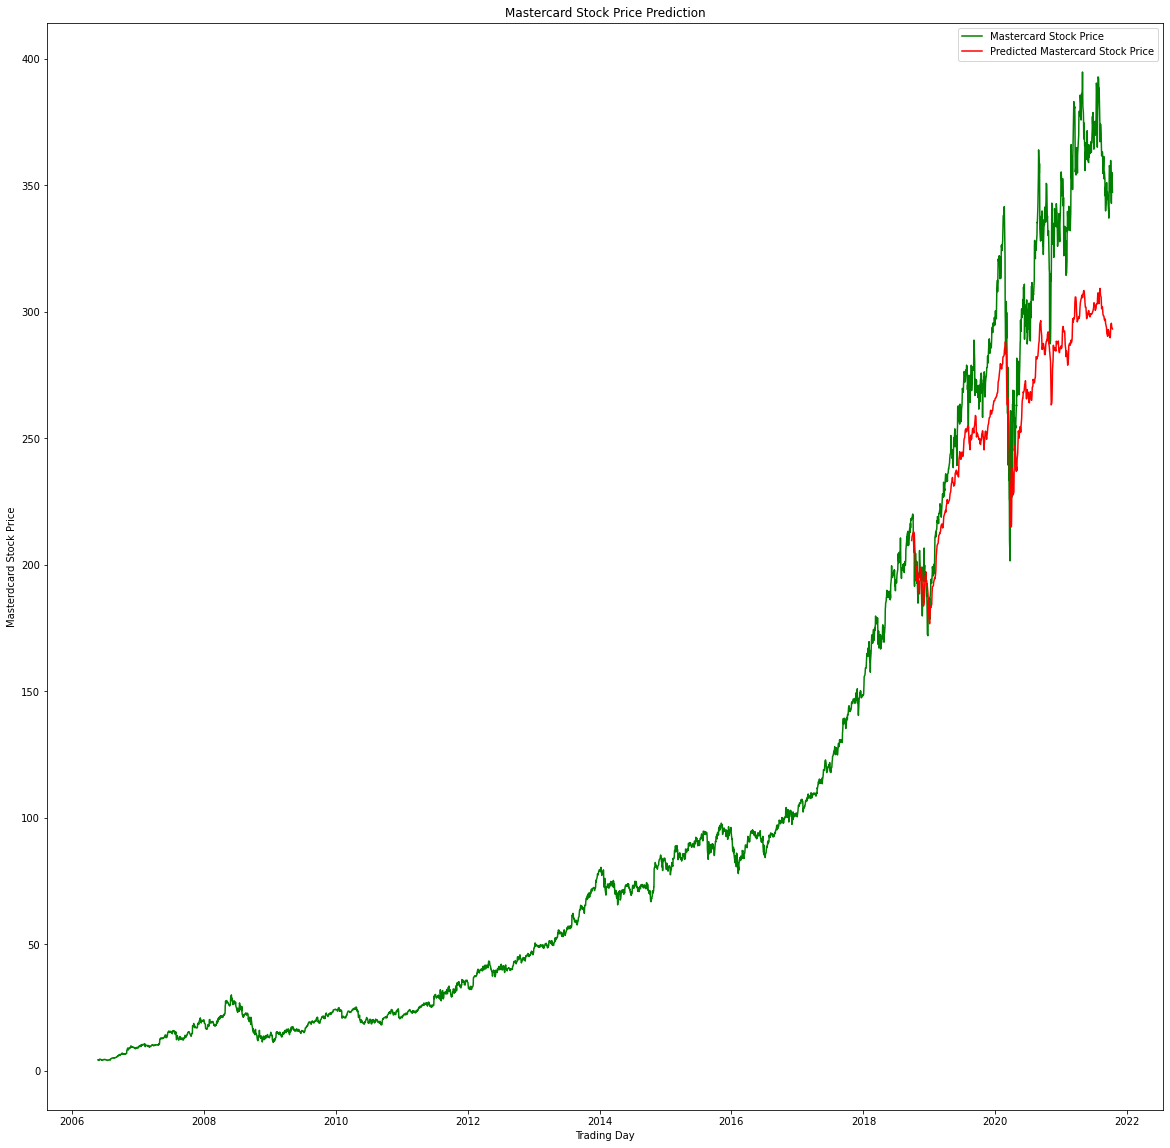

In [ ]:
#Visualizing the prediction
plt.figure(figsize=(20,20))
plt.plot(real_stock_price, color = 'green', label = 'Mastercard Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Mastercard Stock Price')
plt.title('Mastercard Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Masterdcard Stock Price')
plt.legend()
plt.show()

In [ ]:
Y_test = df.iloc[3105:3872,3]
Y_test

Date
2018-09-25    218.380951
2018-09-26    218.518616
2018-09-27    218.567810
2018-09-28    218.862717
2018-10-01    220.003174
                 ...    
2021-10-05    342.776886
2021-10-06    348.250000
2021-10-07    353.910004
2021-10-08    354.959991
2021-10-11    347.149994
Name: Close, Length: 767, dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(Y_test, predicted_stock_price, squared=False)
rms

41.61659840000214